In [35]:
import Pkg; Pkg.add("Compat")
import Pkg; Pkg.add("Random")
import Pkg; Pkg.add("Distributions")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("LaTeXStrings")
import Pkg; Pkg.add("PyCall")
import Pkg; Pkg.add("Plotly")

 Resolving package versions...
  Updating `C:\Users\adwol\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\adwol\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\adwol\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\adwol\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\adwol\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\adwol\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\adwol\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\adwol\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\adwol\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\adwol\.julia\environments\v1.0\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updatin

In [36]:
using Compat, Distributions, Plots, LaTeXStrings, PyCall, Plotly

Initialize parameters

In [61]:
nrep = 10000
nobs = [50 100 200 500 1000 5000]
alpha_0 = 1
alpha_1 = 1
coef = zeros(nrep,length(nobs))
tstat = zeros(nrep,length(nobs));

In [38]:
function ols(a,b)
    k = length(b[:,1])
    beta = inv(b'*b)*(b'*a)
    e = a-b*beta
    varcov = (e'*e/k)*inv(b'*b)
    t = beta[1]/sqrt(varcov[1,1])
    [beta[1] t]
end

ols (generic function with 1 method)

Now we generate the data and perform the OLS regressions. Note that we will run the following regression,

\begin{equation}
\Delta y_t = \beta y_{t-1} + \sum_{i = 1}^{p}{\beta_i \Delta y_{t-i}} + \epsilon_{p,t}
\end{equation}

Therefore, the unit root test is then a test that $\beta = 0$ (which is what the t statistic in the OLS function above will test for).

In [65]:
for i = 1:nrep
    for j = 1:length(nobs)
        n = nobs[j]
        y = zeros(1,n)
        epsilon = randn(1,n)
        for t = 1:n-1
            y[t+1] = y[t] + epsilon[t+1]*sqrt(alpha_0 + alpha_1*epsilon[t]^2)
        end
        p = 5
        x = zeros(n-p-1,p+1)
        x[:,1] = y[p+1:n-1]
        for i = 2:p+1
           x[:,i] = y[i:n-p-2+i]-y[i-1:n-p-3+i]
        end
        z = y[p+2:n]-y[p+1:n-1]
        (coef[i,j], tstat[i,j]) = ols(z,x)
    end
end

We now plot the distributions of the OLS t statistics that we computed above. Unfortunately, Adrian is very bad with Julia and could not figure out how to write titles on the histograms, so please note that sample size increases as we move to the right and down in the set of histograms (so the top line has sample sizes of 50, 100, and 200, while the bottom line has sample sizes of 500, 1000, and 5000).

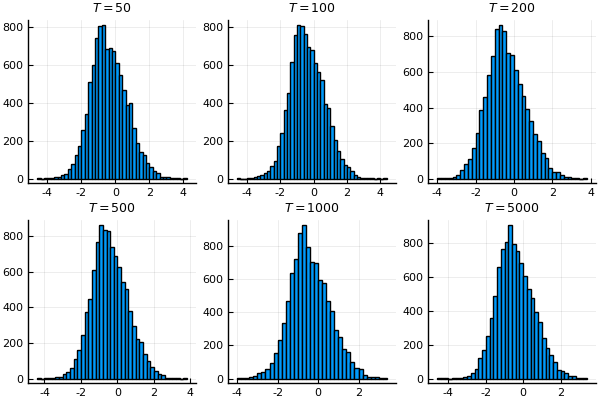

In [128]:
Plots.pyplot()

titles = Array{String}(undef, 1, length(nobs))
for i = 1:length(nobs)
    t = string(L"$T = $", nobs[i])
    titles[i] = t
end
Plots.histogram(tstat,
            layout=length(nobs),
            title = titles,
            legend=:none,
            titlefont=Plots.font(9))

In [71]:
nrep = 10000

import Plots
Plots.pyplot()

Plots.PyPlotBackend()

In the following, we create a matrix of Karhunen-Loeve basis functions that will be needed later for generating the Brownian motions.

In [72]:
G = 1000
u = 0:1/G:1
N = 1000
KLbasis = zeros(N,G+1)
for k = 1:N
   KLbasis[k,:] = (sqrt(2)/((k-.5)*pi))*sin.((k-.5)*pi*u) 

end

Now we generate the supposed asymptotic distribution of our t-statistics, which is given by
\begin{equation}
\frac{\int_0^1 W(t)\mathrm{d}W(t)}{\int_0^1 W(t)^2 \mathrm{d}t}=\frac{\frac{1}{2}\left(W(1)^2-1\right)}{\left(\int_0^1W(t)^2 \mathrm{d}t\right)^{1/2}}
\end{equation}
where $W(\cdot)$ is the Brownian motion.

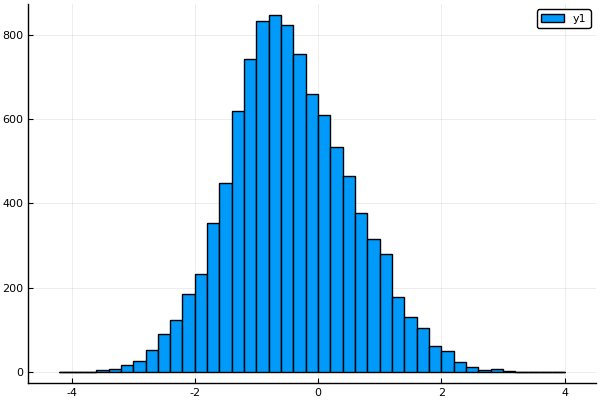

In [73]:
draws = zeros(nrep)
for i = 1:nrep
    B = randn(1,N)*KLbasis
    B2 = B.^2
    x = (0.5*(B[1,G+1]^2-1))./sqrt.(sum(B2)/G)
    draws[i] = x[1,1]
end

Plots.histogram(draws)

We can see that the distributions are the same.